In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/hanifadelekan/dev/Quant/newobdata.csv')

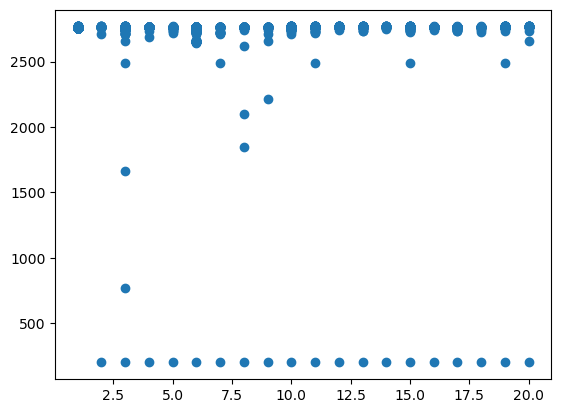

In [3]:
plt.scatter(x = df['count'],y= df['price'])


In [4]:
df = pd.read_parquet("/Users/hanifadelekan/dev/Quant/order_book.parquet")


In [5]:
import ast
df['bids'] = df['bids'].apply(ast.literal_eval)
df['asks'] = df['asks'].apply(ast.literal_eval)

df_exploded = df['bids'].explode().apply(lambda x: x[0]).astype(float)




In [6]:
df


,count,time,type,price,size,best_bid,best_ask,spread,midprice,length,timestamp,update_count,bids,asks
0,None,None,None,None,None,170.75,170.76,0.01,170.755,2000,1.740279e+12,0.0,"[[170.75, 120.0], [170.74, 182.0], [170.73, 41...","[[170.76, 878.0], [170.77, 524.0], [170.78, 36..."
1,None,None,None,None,None,170.75,170.76,0.01,170.755,2000,1.740279e+12,1.0,"[[170.75, 120.0], [170.74, 182.0], [170.73, 41...","[[170.76, 878.0], [170.77, 524.0], [170.78, 36..."
2,None,None,None,None,None,170.75,170.76,0.01,170.755,2001,1.740279e+12,2.0,"[[170.75, 120.0], [170.74, 193.0], [170.73, 42...","[[170.76, 878.0], [170.77, 524.0], [170.78, 36..."
3,None,None,None,None,None,170.75,170.76,0.01,170.755,2001,1.740279e+12,3.0,"[[170.75, 62.0], [170.74, 182.0], [170.73, 412...","[[170.76, 878.0], [170.77, 524.0], [170.78, 36..."
4,None,None,None,None,None,170.75,170.76,0.01,170.755,2001,1.740279e+12,4.0,"[[170.75, 63.0], [170.74, 193.0], [170.73, 399...","[[170.76, 878.0], [170.77, 524.0], [170.78, 35..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,None,None,None,None,None,170.52,170.53,0.01,170.525,2163,1.740279e+12,1996.0,"[[170.52, 893.0], [170.51, 4631.0], [170.5, 30...","[[170.53, 332.0], [170.54, 172.0], [170.55, 61..."
1997,None,None,None,None,None,170.52,170.53,0.01,170.525,2163,1.740279e+12,1997.0,"[[170.52, 893.0], [170.51, 4631.0], [170.5, 30...","[[170.53, 332.0], [170.54, 172.0], [170.55, 61..."
1998,None,None,None,None,None,170.52,170.53,0.01,170.525,2163,1.740279e+12,1998.0,"[[170.52, 893.0], [170.51, 4631.0], [170.5, 30...","[[170.53, 274.0], [170.54, 172.0], [170.55, 61..."
1999,None,None,None,None,None,170.52,170.53,0.01,170.525,2163,1.740279e+12,1999.0,"[[170.52, 1115.0], [170.51, 4664.0], [170.5, 3...","[[170.53, 111.0], [170.54, 157.0], [170.55, 62..."


In [7]:

df['weighted mid price'] =  (df['bids'].map(lambda x: sum(map(lambda y: y[0]*y[1], x[:100]))) + df['asks'].map(lambda x: sum(map(lambda y: y[0]*y[1], x[:100]))))/(df['bids'].map(lambda x: sum(map(lambda y: y[1], x[:100]))) + df['asks'].map(lambda x: sum(map(lambda y: y[1], x[:100]))))


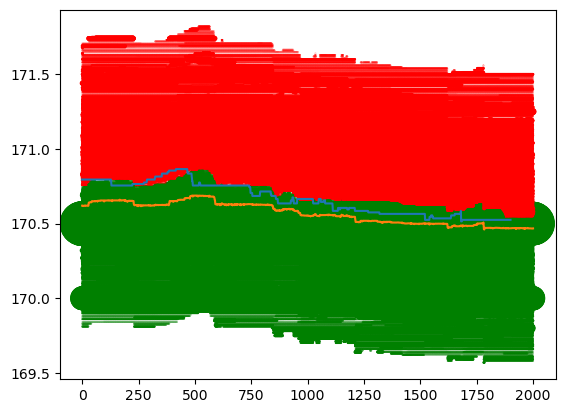

In [ ]:
plt.plot(df['update_count'],df['midprice'].shift(-100))
plt.plot(df['update_count'],df['weighted mid price'])
for n in range(100):
    plt.scatter(df['update_count'], df['bids'].map(lambda x: x[n][0]), s=df['bids'].map(lambda x: x[n][1]**2) * 0.00000001, c='g')
    plt.scatter(df['update_count'], df['asks'].map(lambda x: x[n][0]), s=df['asks'].map(lambda x: x[n][1]**2) * 0.00000001, c='r')

plt.show()

